In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Bird Strikes data.xlsx - Bird Strikes.csv')

In [ ]:
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [ ]:
data['Cost: Total $'] = data['Cost: Total $'].str.replace(',', '')
data['Feet above ground'] = data['Feet above ground'].str.replace(',','')

In [ ]:
data.isnull().any()

Record ID                                  False
Aircraft: Type                              True
Airport: Name                               True
Altitude bin                                True
Aircraft: Make/Model                       False
Wildlife: Number struck                     True
Wildlife: Number Struck Actual             False
Effect: Impact to flight                    True
FlightDate                                  True
Effect: Indicated Damage                   False
Aircraft: Number of engines?                True
Aircraft: Airline/Operator                  True
Origin State                                True
When: Phase of flight                       True
Conditions: Precipitation                   True
Remains of wildlife collected?             False
Remains of wildlife sent to Smithsonian    False
Remarks                                     True
Wildlife: Size                              True
Conditions: Sky                            False
Wildlife: Species   

In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data.isnull().any()

Record ID                                  False
Aircraft: Type                             False
Airport: Name                              False
Altitude bin                               False
Aircraft: Make/Model                       False
Wildlife: Number struck                    False
Wildlife: Number Struck Actual             False
Effect: Impact to flight                   False
FlightDate                                 False
Effect: Indicated Damage                   False
Aircraft: Number of engines?               False
Aircraft: Airline/Operator                 False
Origin State                               False
When: Phase of flight                      False
Conditions: Precipitation                  False
Remains of wildlife collected?             False
Remains of wildlife sent to Smithsonian    False
Remarks                                    False
Wildlife: Size                             False
Conditions: Sky                            False
Wildlife: Species   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def outliers(str,column):
  plt.figure(figsize=(8,6))
  sns.boxplot(y=data[column])
  plt.title(f'The Boxplot of {column} {str}')
  plt.show()

Before Outlier


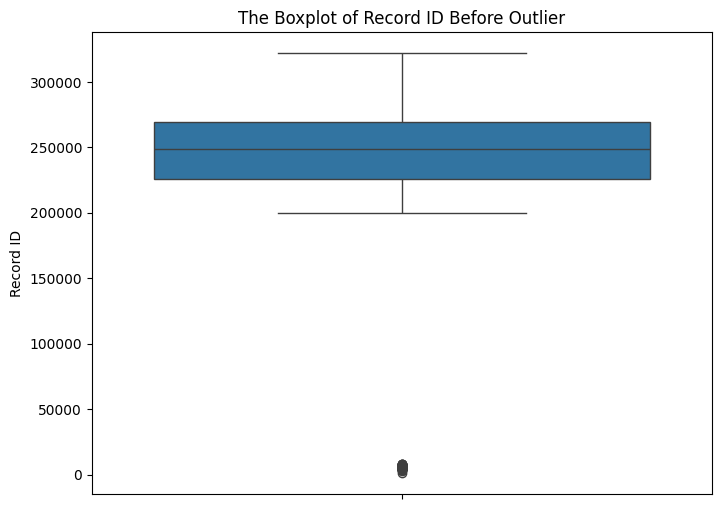

After Outlier


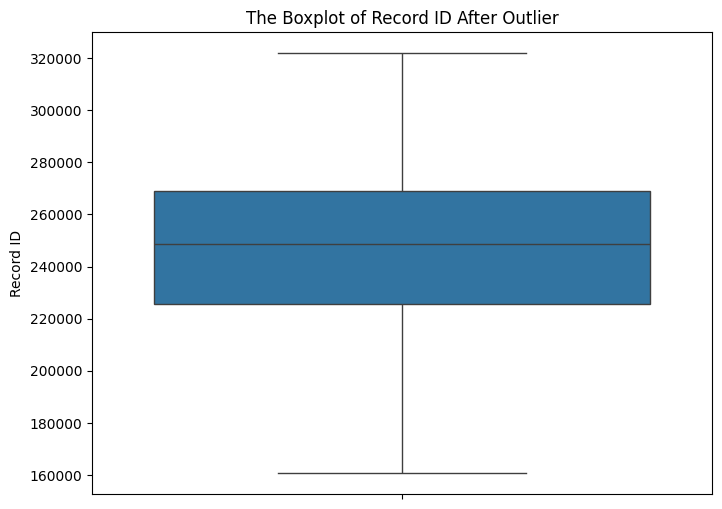

Before Outlier


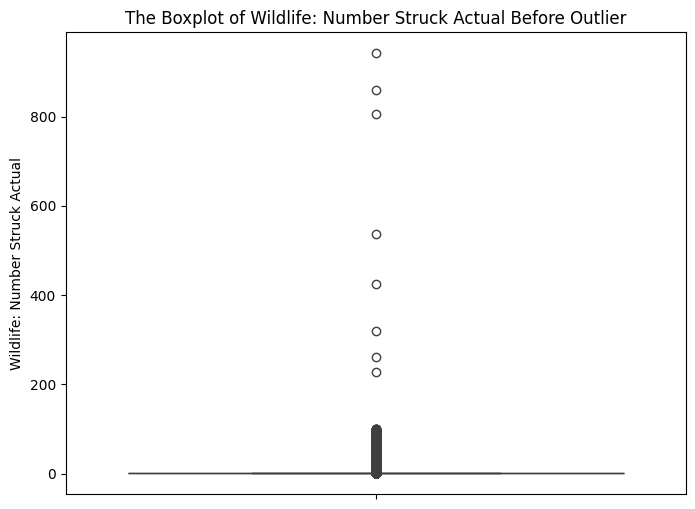

After Outlier


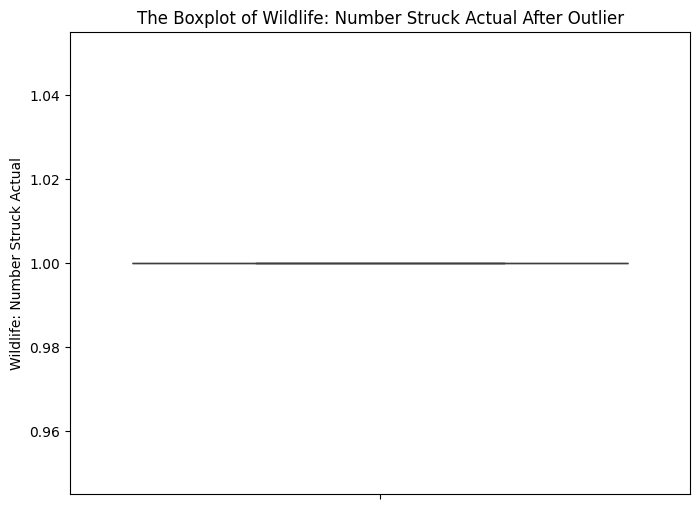

Before Outlier


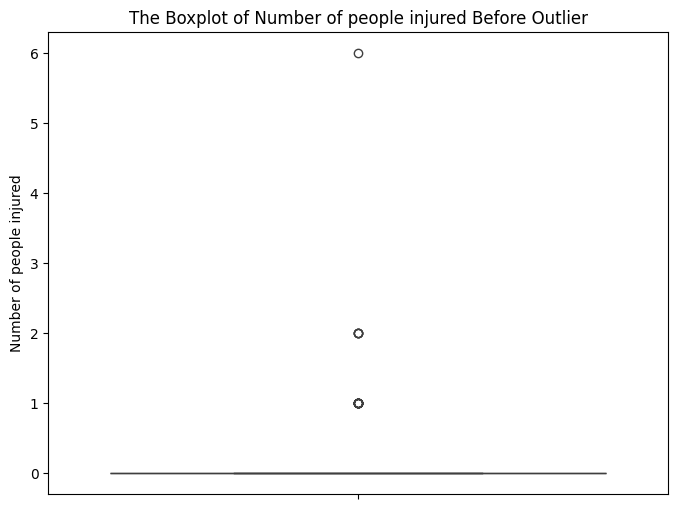

After Outlier


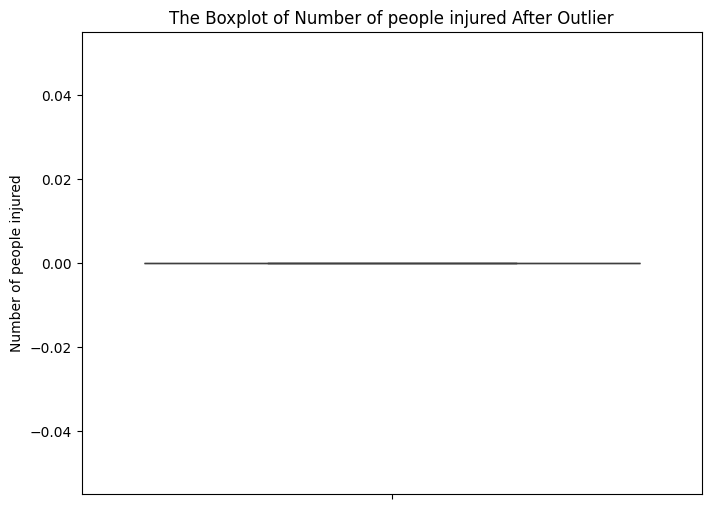

In [ ]:
for column in data:
  if data[column].dtype == 'int64' or data[column].dtype == 'float64':

    print("Before Outlier")
    outliers('Before Outlier',column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr =q3 - q1

    lb =q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr

    data.loc[(data[column] < lb),column] = lb
    data.loc[(data[column] > ub,column)] = ub

    print("After Outlier")
    outliers('After Outlier',column)

In [ ]:
data

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152.0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,1,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500,0,Yes
1,208159.0,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,1,0,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601.0,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,1,0,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953.0,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,1,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878.0,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,1,0,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151.0,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,0,12/30/11 0:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,1500,0,No
25554,319677.0,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,0,12/30/11 0:00,No damage,...,False,0,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680.0,0,0,0,EC-135,0,1,0,0,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,0,No Cloud,Unknown bird - small,0,0,0,0,0
25556,319679.0,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,0,12/31/11 0:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


In [ ]:
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

data['Year'] = data['FlightDate'].dt.year
data['Month'] = data['FlightDate'].dt.month
data['Day'] = data['FlightDate'].dt.day
data['hour'] = data['FlightDate'].dt.hour
data['minute'] = data['FlightDate'].dt.minute

<ipython-input-378-10de64a22f9a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['FlightDate'] = pd.to_datetime(data['FlightDate'])


In [ ]:
data.drop('FlightDate',axis = 1)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,Effect: Indicated Damage,Aircraft: Number of engines?,...,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year,Month,Day,hour,minute
0,202152.0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,1,Engine Shut Down,Caused damage,2,...,N,30736,1500,0,Yes,2000,11,23,0,0
1,208159.0,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,1,0,Caused damage,2,...,Y,0,0,0,No,2001,7,25,0,0
2,207601.0,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,1,0,No damage,2,...,N,0,50,0,No,2001,9,14,0,0
3,215953.0,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,1,Precautionary Landing,No damage,2,...,Y,0,50,0,Yes,2002,9,5,0,0
4,219878.0,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,1,0,No damage,2,...,N,0,50,0,No,2003,6,23,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151.0,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,0,No damage,2,...,N,0,1500,0,No,2011,12,30,0,0
25554,319677.0,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,0,No damage,2,...,Y,0,0,0,No,2011,12,30,0,0
25555,319680.0,0,0,0,EC-135,0,1,0,No damage,0,...,0,0,0,0,0,1970,1,1,0,0
25556,319679.0,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,0,No damage,2,...,Y,0,0,0,Yes,2011,12,31,0,0


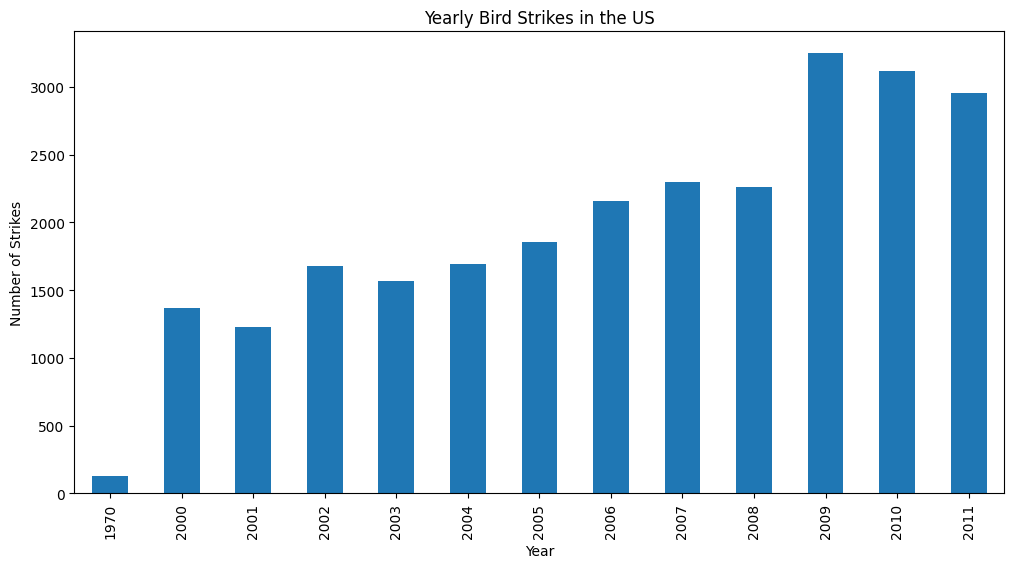

In [ ]:
yearly_strikes = data['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_strikes.plot(kind='bar')
plt.title('Yearly Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.show()

In [ ]:
us_airline_data = data[data['Aircraft: Airline/Operator'] == 'AMERICAN AIRLINES']

top_us_airlines = us_airline_data['Aircraft: Airline/Operator'].value_counts().head(10).sort_values(ascending=False)

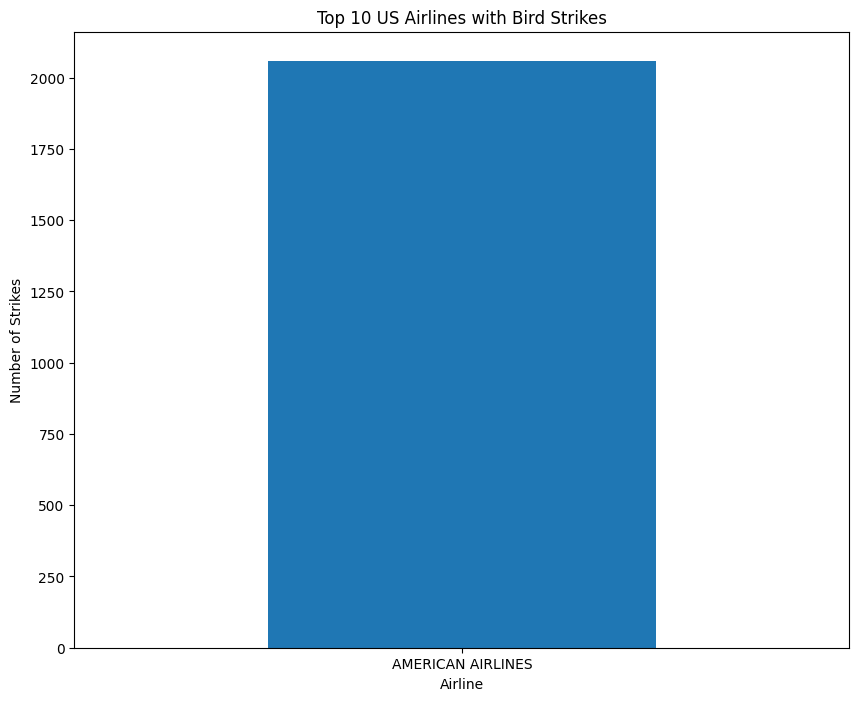

In [ ]:
# Top 10 US Airlines with Bird Strikes
plt.figure(figsize=(10, 8))
top_us_airlines.plot(kind='bar')
plt.title('Top 10 US Airlines with Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=0)
plt.show()

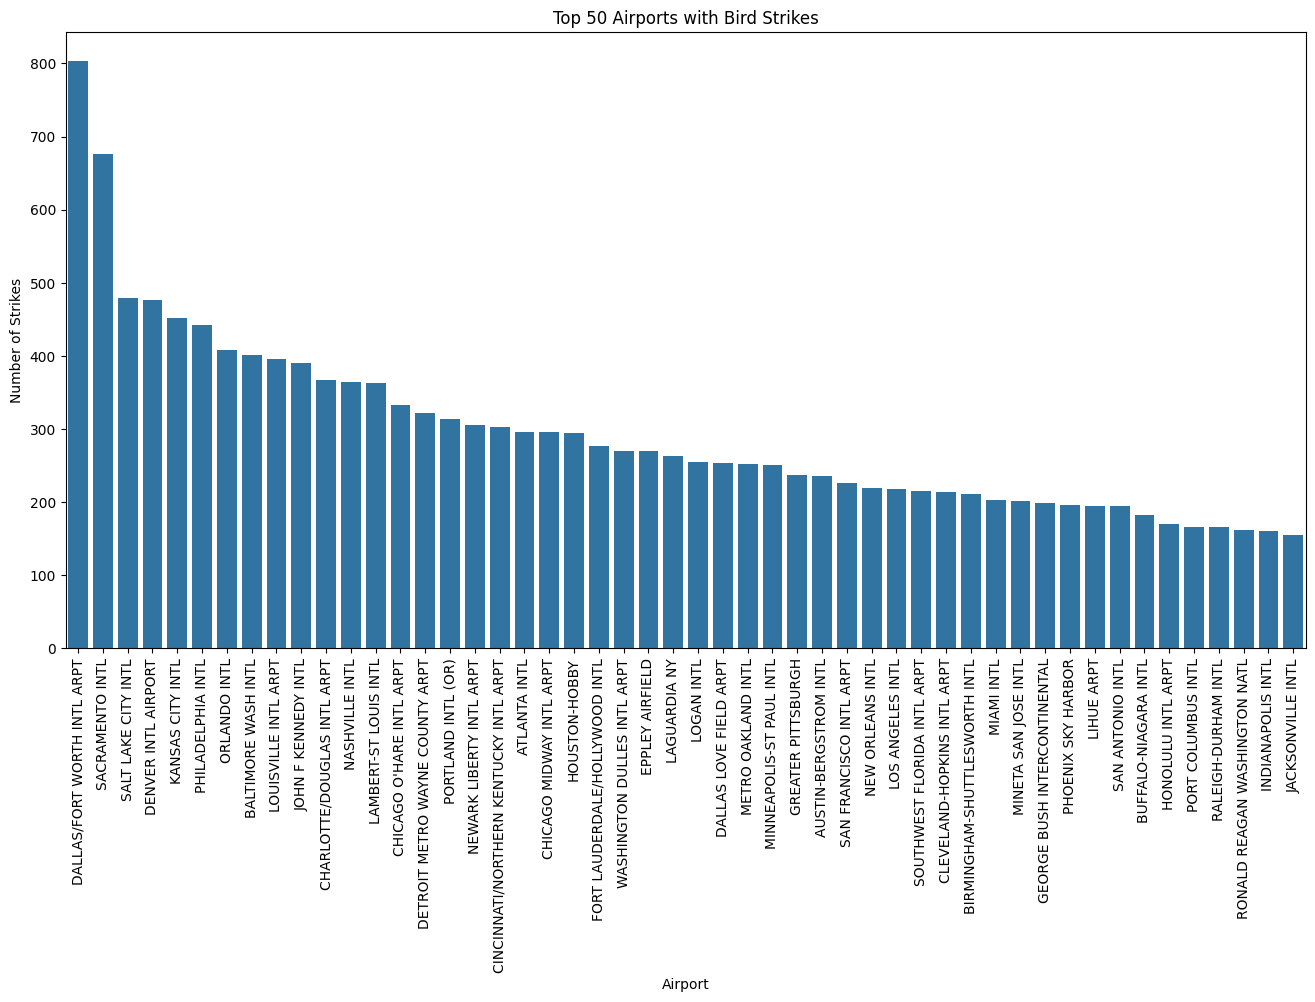

In [ ]:
# Top 50 Airports with Bird Strikes
top_airports = data['Airport: Name'].value_counts().head(50).sort_values(ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.title('Top 50 Airports with Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['Cost: Total $']= data['Cost: Total $'].astype(float)

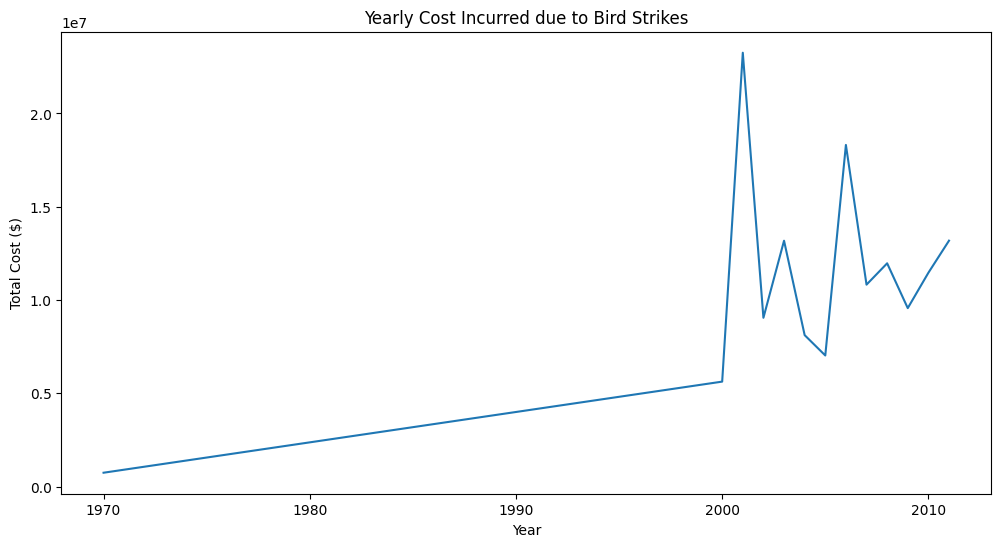

In [ ]:
# Yearly Cost Incurred due to Bird Strikes
yearly_cost = data.groupby('Year')['Cost: Total $'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_cost.index, y=yearly_cost.values)
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()


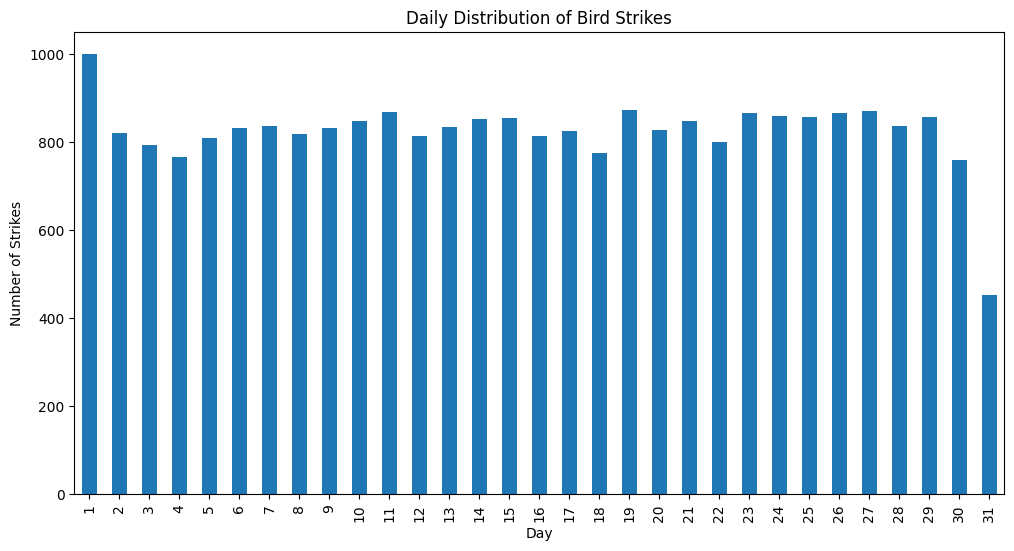

In [ ]:
# Hourly Distribution of Bird Strikes
daily_strikes = data['Day'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
daily_strikes.plot(kind='bar')
plt.title('Daily Distribution of Bird Strikes')
plt.xlabel('Day')
plt.ylabel('Number of Strikes')
plt.show()


In [ ]:
data['Feet above ground'].astype(float)

0        1500.0
1           0.0
2          50.0
3          50.0
4          50.0
          ...  
25553    1500.0
25554       0.0
25555       0.0
25556       0.0
25557       0.0
Name: Feet above ground, Length: 25558, dtype: float64

In [ ]:
data.head(100)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year,Month,Day,hour,minute
0,202152.0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,1,Engine Shut Down,2000-11-23,Caused damage,...,N,30736.0,1500,0,Yes,2000,11,23,0,0
1,208159.0,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,1,0,2001-07-25,Caused damage,...,Y,0.0,0,0,No,2001,7,25,0,0
2,207601.0,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,1,0,2001-09-14,No damage,...,N,0.0,50,0,No,2001,9,14,0,0
3,215953.0,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,1,Precautionary Landing,2002-09-05,No damage,...,Y,0.0,50,0,Yes,2002,9,5,0,0
4,219878.0,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,1,0,2003-06-23,No damage,...,N,0.0,50,0,No,2003,6,23,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,202117.0,Airplane,PANAMA CITY - BAY COUNTY INTL,< 1000 ft,ATR-72,2 to 10,1,0,2000-07-11,No damage,...,Y,0.0,0,0,No,2000,7,11,0,0
96,202204.0,Airplane,BIRMINGHAM-SHUTTLESWORTH INTL,< 1000 ft,B-737-300,2 to 10,1,0,2000-07-12,No damage,...,Y,0.0,0,0,Yes,2000,7,12,0,0
97,205917.0,Airplane,PANAMA CITY - BAY COUNTY INTL,< 1000 ft,ATR-72,2 to 10,1,0,2000-07-15,No damage,...,Y,0.0,0,0,No,2000,7,15,0,0
98,204602.0,Airplane,SUVA FIJI,< 1000 ft,A-320,2 to 10,1,0,2000-07-16,No damage,...,N,0.0,100,0,No,2000,7,16,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  float64       
 1   Aircraft: Type                           25558 non-null  object        
 2   Airport: Name                            25558 non-null  object        
 3   Altitude bin                             25558 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25558 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25558 non-null  object        
 8   FlightDate                               25558 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [ ]:
# Convert 'Feet above ground' to float and update the DataFrame
data['Feet above ground'] = data['Feet above ground'].astype(float)

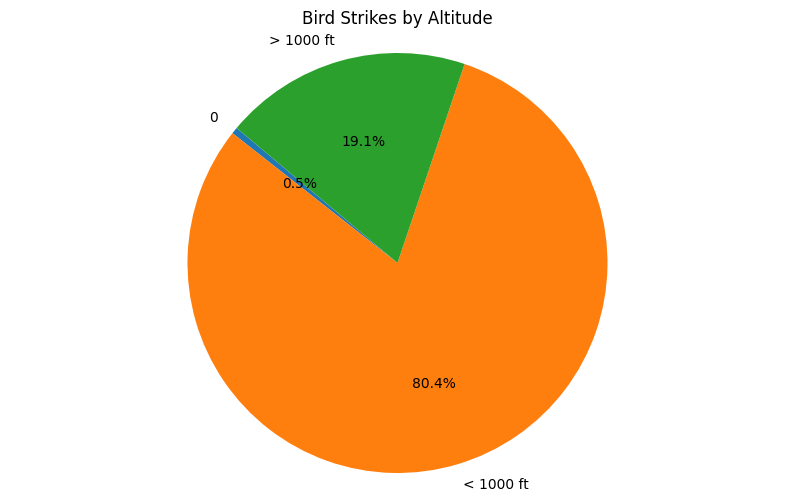

In [ ]:
# Count bird strikes by altitude
altitude_counts = data.groupby('Altitude bin')['Wildlife: Number Struck Actual'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(altitude_counts, labels=altitude_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Bird Strikes by Altitude')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

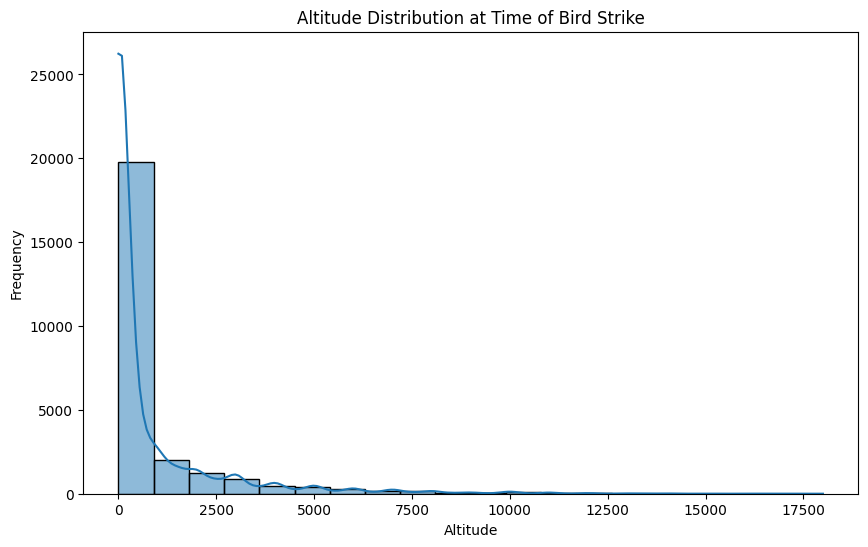

In [ ]:
# Distribution of Altitude at Time of Strike
plt.figure(figsize=(10, 6))
sns.histplot(data['Feet above ground'], bins=20, kde=True)
plt.title('Altitude Distribution at Time of Bird Strike')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.show()

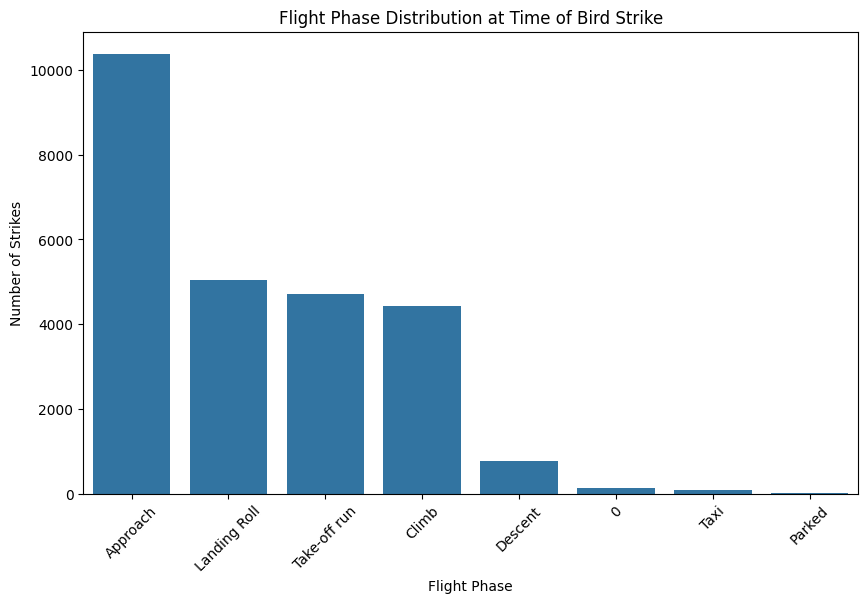

In [ ]:
# Distribution of Flight Phase at Time of Strike
flight_phase_counts = data['When: Phase of flight'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='When: Phase of flight', data=data, order= flight_phase_counts.index)
plt.title('Flight Phase Distribution at Time of Bird Strike')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.show()


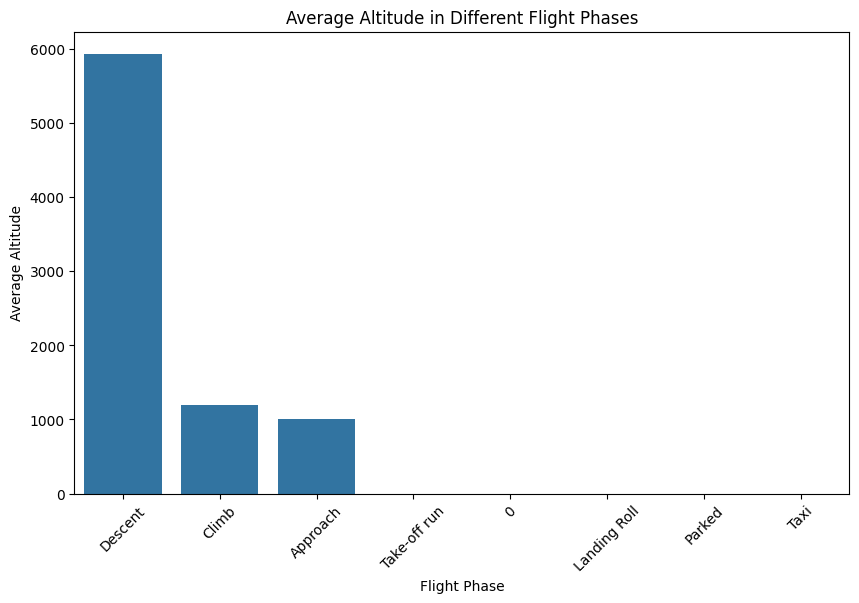

In [ ]:
# Average Altitude in Different Flight Phases
avg_altitude_phase = data.groupby('When: Phase of flight')['Feet above ground'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_altitude_phase.index, y=avg_altitude_phase.values)
plt.title('Average Altitude in Different Flight Phases')
plt.xlabel('Flight Phase')
plt.ylabel('Average Altitude')
plt.xticks(rotation=45)
plt.show()


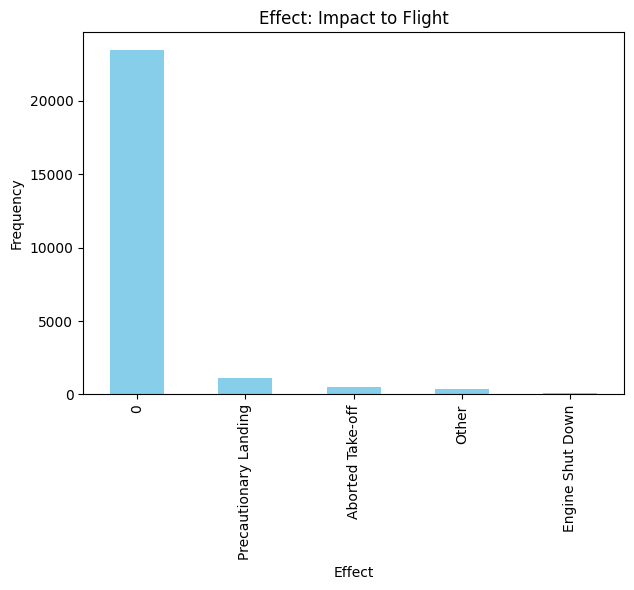

In [ ]:
# Count occurrences of each category in 'Effect: Impact to flight'
impact_counts = data['Effect: Impact to flight'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Subplot for 'Effect: Impact to flight'
plt.subplot(1, 2, 1)
impact_counts.plot(kind='bar', color='skyblue')
plt.title('Effect: Impact to Flight')
plt.xlabel('Effect')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()


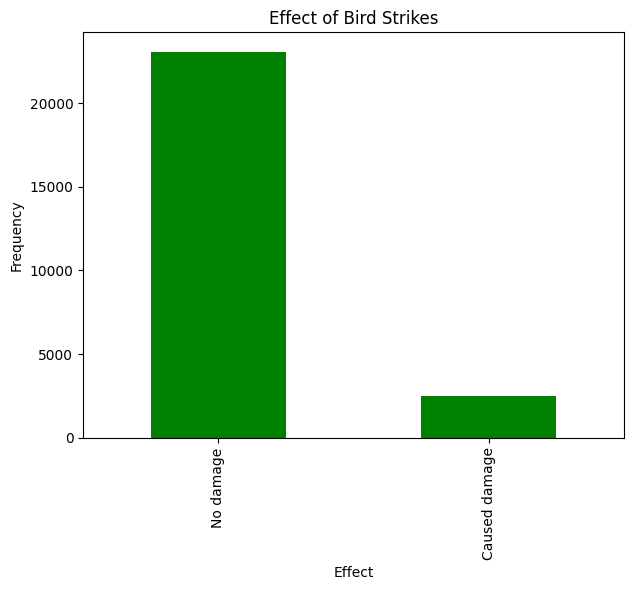

In [ ]:
# Count occurrences of each category in 'Effect'
effect_counts = data['Effect: Indicated Damage'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Subplot for 'Effect'
plt.subplot(1, 2, 2)
effect_counts.plot(kind='bar', color='green')
plt.title('Effect of Bird Strikes')
plt.xlabel('Effect')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

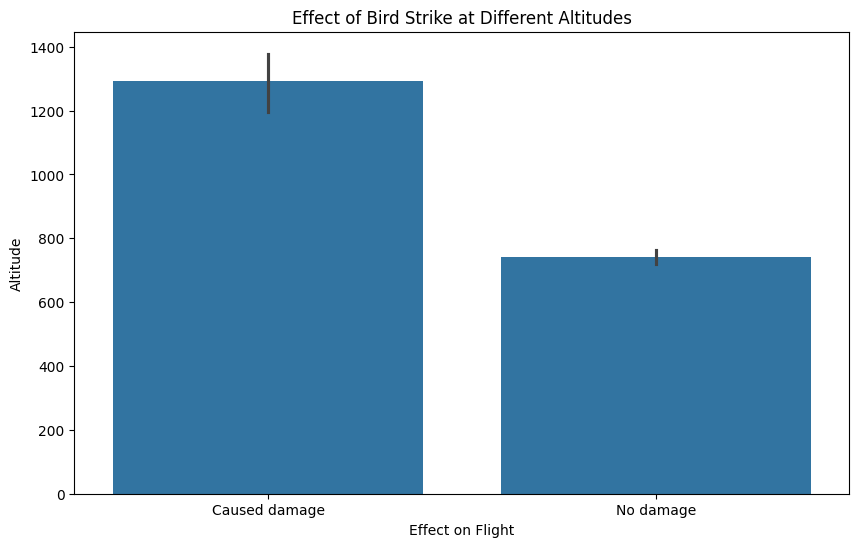

In [ ]:
# Effect of Bird Strike at Different Altitudes
plt.figure(figsize=(10, 6))
sns.barplot(x='Effect: Indicated Damage', y='Feet above ground', data=data)
plt.title('Effect of Bird Strike at Different Altitudes')
plt.xlabel('Effect on Flight')
plt.ylabel('Altitude')
plt.show()
